### My rollno : 23B1221
Hence a = 1
b = 10

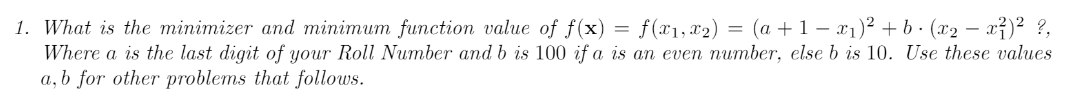

The two terms can be independently minimized(made zero - as they are square terms). So the minimizer function is the function itself.  
So the minimum function value is 0.  
The values of x1_min and x2_min are (2,4)

In [47]:
a=1
b=10

In [48]:
def f(x1,x2):
    return (a+1-x1)*(a+1-x1) + b*(x2 - x1*x1)*(x2 - x1*x1)

In [49]:
def df_dx1(x1,x2):
    return -2*(a+1-x1) + 2*b*(x2 - x1*x1)*(-2*x1)

In [50]:
def df_dx2(x1,x2):
    return 2*b*(x2 - x1*x1)

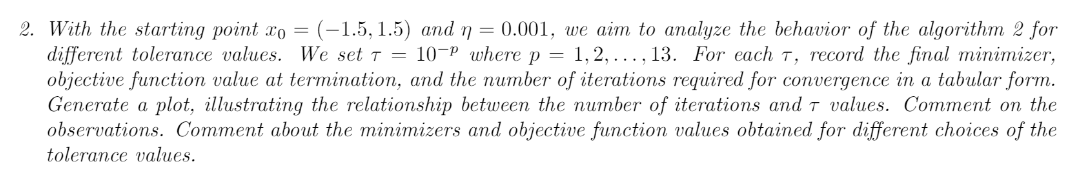

In [51]:
import numpy as np

In [52]:

# Defining the norm function
def L2Norm(x,y):
    grad_x1 = df_dx1(x,y)
    grad_x2 = df_dx2(x,y)
    return np.sqrt(grad_x1** 2 + grad_x2** 2)

# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

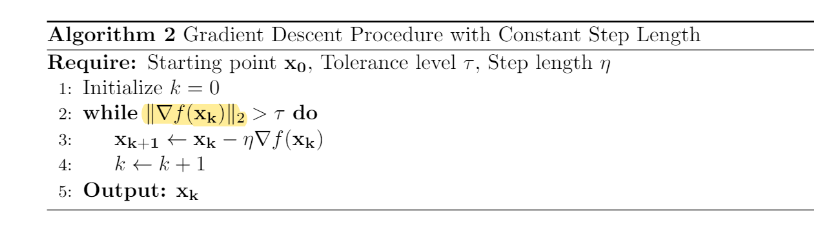

In [57]:
def gradient_descent(start_X1, start_x2, step_length,p_values):

    iter_list = []
    minimizer_list = []
    function_value_list = []

    for i in range(len(p_values)):

        x1 = start_X1
        x2 = start_x2
        tolerance_lvl = pow(10,-p_values[i])

        iter = 0
        while(L2Norm(x1,x2) > tolerance_lvl):
            df_dx1_temp = df_dx1(x1,x2)
            df_dx2_temp = df_dx2(x1,x2)
            x1 = x1 - step_length*df_dx1_temp
            x2 = x2 - step_length*df_dx2_temp
            iter = iter + 1

        iter_list.append(iter)
        minimizer_list.append([x1,x2])
        function_value_list.append(f(x1,x2))

    return p_values,iter_list,minimizer_list,function_value_list

In [65]:
x1_start = -1.5
x2_start = 1.5
step_length = 0.001
p_values = [i for i in range(1,10)]
p_vals,iter_lst,minimizer_lst,function_value_lst = gradient_descent(x1_start,x2_start,step_length,p_values)

In [66]:
from tabulate import tabulate

In [67]:

# Combine into a table
table = zip(p_vals, iter_lst, minimizer_lst, function_value_lst)

# Define column headers
headers = ["P value", "Iterations", "Minimizer", "Function Value"]

# Print the table
print(tabulate(table, headers=headers, tablefmt="grid"))


+-----------+--------------+------------------------------------------+------------------+
|   P value |   Iterations | Minimizer                                |   Function Value |
+===========+==============+==========================================+==================+
|         1 |        10326 | [1.8120310595031055, 3.2786342254076364] |      0.0355649   |
+-----------+--------------+------------------------------------------+------------------+
|         2 |        27996 | [1.9795825429351357, 3.918262094822623]  |      0.000419224 |
+-----------+--------------+------------------------------------------+------------------+
|         3 |        47455 | [1.997940476594096, 3.9917176277943422]  |      4.26518e-06 |
+-----------+--------------+------------------------------------------+------------------+
|         4 |        67112 | [1.9997938686239187, 3.9991706647241467] |      4.27256e-08 |
+-----------+--------------+------------------------------------------+------------------+

From the table, we infer a few things  
With the no of iterations increasing by about 2000 for unit increase in pvalue, the the minimizer accuaracy shifts by one decimal place each time and the function value's accuracy shifts by two decimals each time.

In [68]:
import matplotlib.pyplot as plt

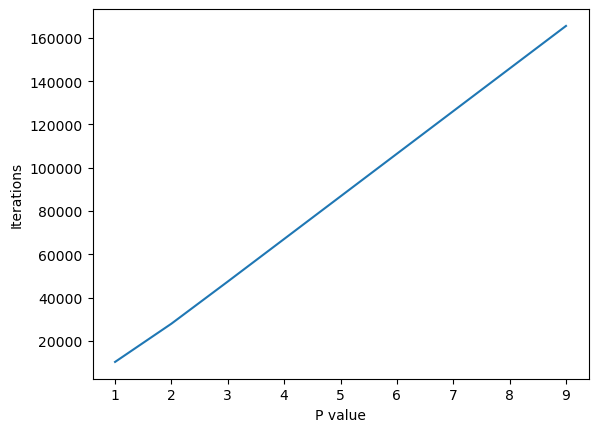

In [70]:
plt.plot(p_vals,iter_lst)
plt.xlabel("P value")
plt.ylabel("Iterations")
plt.show()

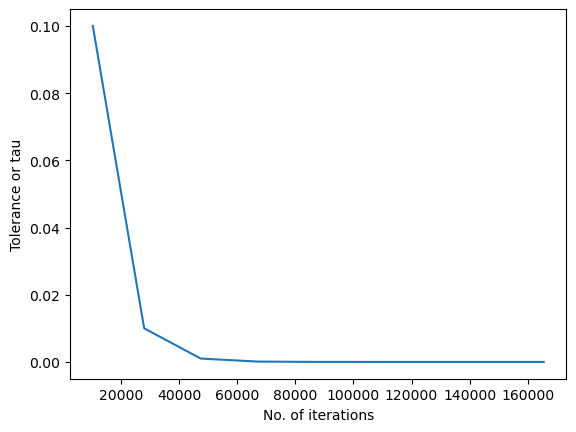

In [74]:
tolerance = [10**(-x) for x in p_vals]

plt.plot(iter_lst,tolerance)
plt.xlabel("No. of iterations")
plt.ylabel("Tolerance or tau")
plt.show()

We can see that the Iteration vs tau graph follows a expoenential decay in tolerance with no of iterations.  